## 凸性
凸性（convexity）在优化算法的设计中起到⾄关重要的作⽤，这主要是由于在这种情况下对算法进⾏分析和
测试要容易。换⾔之，如果算法在凸性条件设定下的效果很差，那通常我们很难在其他条件下看到好的结果。
此外，即使深度学习中的优化问题通常是⾮凸的，它们也经常在局部极⼩值附近表现出⼀些凸性。这可能会
产⽣⼀些像 (Izmailov et al., 2018)这样⽐较有意思的新优化变体。

In [1]:
%matplotlib inline
import numpy as np
import torch
from mpl_toolkits import mplot3d
from d2l import torch as d2l

### 定义
在进⾏凸分析之前，我们需要定义凸集（convex sets）和凸函数（convex functions）。

#### 凸集
凸集（convex set）是凸性的基础。简单地说，如果对于任何a, b ∈ X，连接a和b的线段也位于X中，则向量
空间中的⼀个集合X是凸（convex）的。在数学术语上，这意味着对于所有λ ∈ [0, 1]，我们得到  
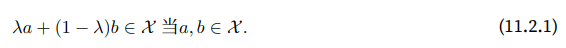

这听起来有点抽象，那我们来看⼀下 图11.2.1⾥的例⼦。第⼀组存在不包含在集合内部的线段，所以该集合
是⾮凸的，⽽另外两组则没有这样的问题。

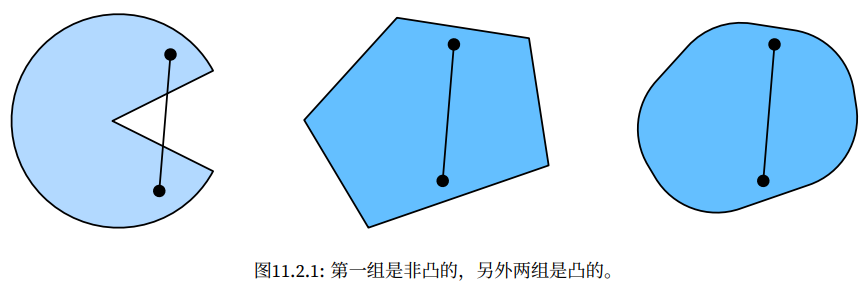

接下来来看⼀下交集 图11.2.2。假设X和Y是凸集，那么X ∩ Y也是凸集的。现在考虑任意a, b ∈ X ∩ Y，因
为X和Y是凸集，所以连接a和b的线段包含在X和Y中。鉴于此，它们也需要包含在X ∩ Y中，从⽽证明我们
的定理。

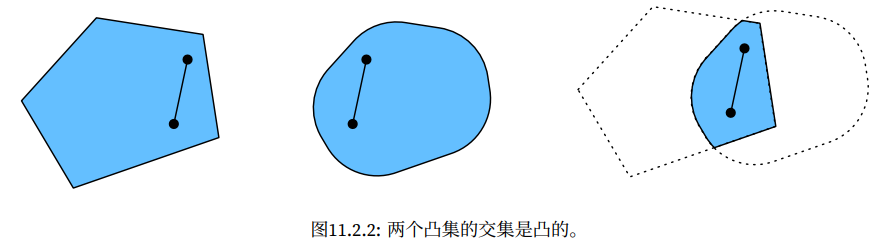

我们可以毫不费⼒地进⼀步得到这样的结果：给定凸集Xi，它们的交集∩iXi是凸的。但是反向是不正确的，
考虑两个不相交的集合X ∩ Y = ∅，取a ∈ X和b ∈ Y。因为我们假设X ∩ Y = ∅，在 图11.2.3中连接a和b的线
段需要包含⼀部分既不在X也不在Y中。因此线段也不在X ∪ Y中，因此证明了凸集的并集不⼀定是凸的，即
⾮凸（nonconvex）的。

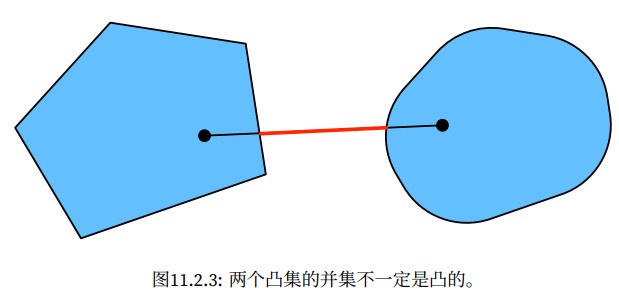

通 常， 深 度 学 习 中 的 问 题 是 在 凸 集 上 定 义 的。 例 如，R
d， 即 实 数 的d-维 向 量 的 集 合 是 凸 集 （毕
竟:math:mathbb{R}^d中任意两点之间的线存在R
d）中。在某些情况下，我们使⽤有界⻓度的变量，例如
球的半径定义为{x|x ∈ R
d 且∥x∥ ≤ r}。

#### 凸函数
现在我们有了凸集，我们可以引⼊凸函数（convex function）f。给定⼀个凸集X，如果对于所有x, x′ ∈ X和
所有λ ∈ [0, 1]，函数f : X → R是凸的，我们可以得到

现在我们有了凸集，我们可以引⼊凸函数（convex function）f。给定⼀个凸集X，如果对于所有x, x′ ∈ X和
所有λ ∈ [0, 1]，函数f : X → R是凸的，我们可以得到

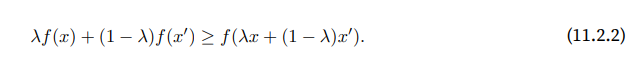

为了说明这⼀点，让我们绘制⼀些函数并检查哪些函数满⾜要求。下⾯我们定义⼀些函数，包括凸函数和⾮
凸函数。



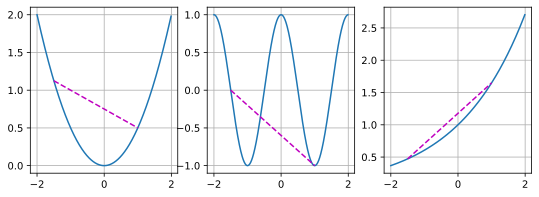

In [2]:
f = lambda x: 0.5 * x**2 # 凸函数
g = lambda x: torch.cos(np.pi * x) # ⾮凸函数
h = lambda x: torch.exp(0.5 * x) # 凸函数

x, segment = torch.arange(-2, 2, 0.01), torch.tensor([-1.5, 1])
d2l.use_svg_display()
_, axes = d2l.plt.subplots(1, 3, figsize=(9, 3))
for ax, func in zip(axes, [f, g, h]):
    d2l.plot([x, segment], [func(x), func(segment)], axes=ax)


不出所料，余弦函数为⾮凸的，⽽抛物线函数和指数函数为凸的。请注意，为使该条件有意义，X是凸集的
要求是必要的。否则可能⽆法很好地界定f(λx + (1 − λ)x′)的结果。


#### 詹森不等式
给定⼀个凸函数f，最有⽤的数学⼯具之⼀就是詹森不等式（Jensen’s inequality）。它是凸性定义的⼀种推
⼴：

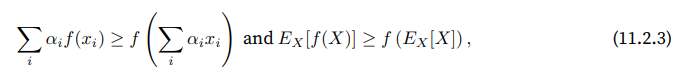

其中αi是满⾜∑
i αi = 1的⾮负实数，X是随机变量。换句话说，凸函数的期望不⼩于期望的凸函数，其中后
者通常是⼀个更简单的表达式。为了证明第⼀个不等式，我们多次将凸性的定义应⽤于⼀次求和中的⼀项。

詹森不等式的⼀个常⻅应⽤：⽤⼀个较简单的表达式约束⼀个较复杂的表达式。例如，它可以应⽤于部分观
察到的随机变量的对数似然。具体地说，由于∫
P(Y )P(X | Y )dY = P(X)，所以

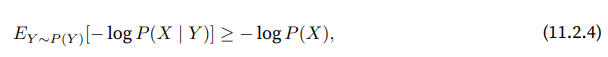

这⾥，Y 是典型的未观察到的随机变量，P(Y )是它可能如何分布的最佳猜测，P(X)是将Y 积分后的分布。例
如，在聚类中Y 可能是簇标签，⽽在应⽤簇标签时，P(X | Y )是⽣成模型。

---

### 性质
* 局部极⼩值是全局极⼩值
* 凸函数的下⽔平集是凸的
* 凸性和⼆阶导数


### 约束
凸优化的⼀个很好的特性是能够让我们有效地处理约束（constraints）。即它使我们能够解决以下形式的约
束优化（constrained optimization）问题：

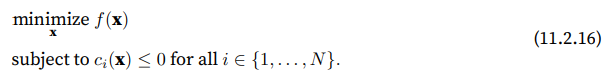

这⾥f是⽬标函数，ci是约束函数。例如第⼀个约束c1(x) = ∥x∥2 − 1，则参数x被限制为单位球。如果第⼆个
约束c2(x) = v⊤x + b，那么这对应于半空间上所有的x。同时满⾜这两个约束等于选择⼀个球的切⽚作为约
束集。  

#### 拉格朗日函数
通常，求解⼀个有约束的优化问题是困难的，解决这个问题的⼀种⽅法来⾃物理中相当简单的直觉。想象⼀
个球在⼀个盒⼦⾥，球会滚到最低的地⽅，重⼒将与盒⼦两侧对球施加的⼒平衡。简⽽⾔之，⽬标函数（即
重⼒）的梯度将被约束函数的梯度所抵消（由于墙壁的“推回”作⽤，需要保持在盒⼦内）。请注意，任何不
起作⽤的约束（即球不接触壁）都将⽆法对球施加任何⼒。

这⾥我们简略拉格朗⽇函数L的推导，上述推理可以通过以下鞍点优化问题来表⽰：

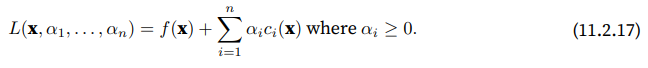

这⾥的变量αi（i = 1, . . . , n）是所谓的拉格朗⽇乘数（Lagrange multipliers），它确保约束被正确地执⾏。选
择它们的⼤⼩⾜以确保所有i的ci(x) ≤ 0。例如，对于ci(x) < 0中任意x，我们最终会选择αi = 0。此外，这
是⼀个鞍点（saddlepoint）优化问题。在这个问题中，我们想要使L相对于αi最⼤化（maximize），同时使
它相对于x最⼩化（minimize）。有⼤量的⽂献解释如何得出函数L(x, α1, . . . , αn)。我们这⾥只需要知道L的
鞍点是原始约束优化问题的最优解就⾜够了。

#### 惩罚
⼀种⾄少近似地满⾜约束优化问题的⽅法是采⽤拉格朗⽇函数L。除了满⾜ci(x) ≤ 0之外，我们只需
将αici(x)添加到⽬标函数f(x)。这样可以确保不会严重违反约束。

事实上，我们⼀直在使⽤这个技巧。⽐如权重衰减 4.5节，在⽬标函数中加⼊λ2|w|
2，以确保w不会增⻓太⼤。使⽤约束优化的观点，我们可以看到，对于若⼲半径r，这将确保|w|
2 − r2 ≤ 0。通过调整λ的值，我们可以改变w的⼤⼩。

通常，添加惩罚是确保近似满⾜约束的⼀种好⽅法。在实践中，这被证明⽐精确的满意度更可靠。此外，对
于⾮凸问题，许多使精确⽅法在凸情况下的性质（例如，可求最优解）不再成⽴。


#### 投影
满⾜约束条件的另⼀种策略是投影（projections）。同样，我们之前也遇到过，例如在 8.5节中处理梯度截断
时，我们通过

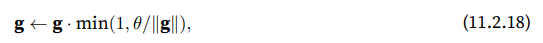

确保梯度的⻓度以θ为界限。

这就是g在半径为θ的球上的投影（projection）。更泛化地说，在凸集X上的投影被定义为  
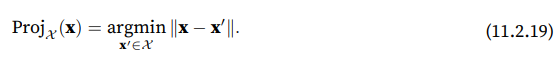

它是X中离X最近的点。

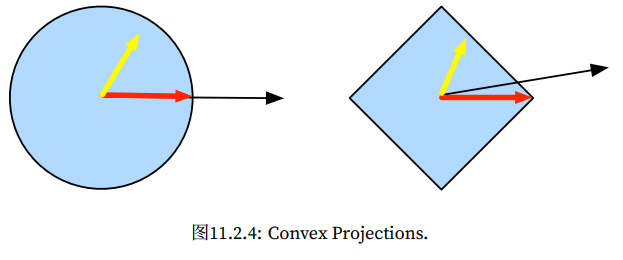

投影的数学定义听起来可能有点抽象，为了解释得更清楚⼀些，请看 图11.2.4。图中有两个凸集，⼀个圆和
⼀个菱形。两个集合内的点（⻩⾊）在投影期间保持不变。两个集合（⿊⾊）之外的点投影到集合中接近原
始点（⿊⾊）的点（红⾊）。虽然对L2的球⾯来说，⽅向保持不变，但⼀般情况下不需要这样。

凸投影的⼀个⽤途是计算稀疏权重向量。在本例中，我们将权重向量投影到⼀个L1的球上，这是 图11.2.4中
菱形例⼦的⼀个⼴义版本。

### 小结
在深度学习的背景下，凸函数的主要⽬的是帮助我们详细了解优化算法。我们由此得出梯度下降法和随机梯
度下降法是如何相应推导出来的。
* 凸集的交点是凸的，并集不是。
* 根据詹森不等式，“⼀个多变量凸函数的总期望值”⼤于或等于“⽤每个变量的期望值计算这个函数的总值“。
* ⼀个⼆次可微函数是凸函数，当且仅当其Hessian（⼆阶导数矩阵）是半正定的。
* 凸约束可以通过拉格朗⽇函数来添加。在实践中，只需在⽬标函数中加上⼀个惩罚就可以了。
* 投影映射到凸集中最接近原始点的点。
